In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

In [2]:
def perform_statistical_analysis(df):
    """
    Performs statistical analysis of the dataset.
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    
    # Basic statistics
    print("Basic Statistics:")
    print(df_numeric.describe())
    
    #Calculating skewness and kurtosis
    print("\nSkewness:")
    print(df_numeric.skew())
    print("\nKurtosis:")
    print(df_numeric.kurtosis())
    
    # Plotting Correlation matrix
    plt.figure(figsize=(10, 8), dpi=300)
    corr_matrix = df_numeric.corr()
    mask = np.triu(np.ones_like(corr_matrix))

    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt='.2f',
                cmap='RdBu_r',
                vmin=-1, vmax=1,
                annot_kws={'size': 12})
    plt.title('Correlation Matrix', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

    # Additional statistical insights
    print("\nKey Statistical Insights:")
    for col in numeric_cols:
        if col != 'year':  # Skipping year column for these statistics
            print(f"\n{col}:")
            print(f"Mean: {df_numeric[col].mean():.2f}")
            print(f"Median: {df_numeric[col].median():.2f}")
            print(f"Standard Deviation: {df_numeric[col].std():.2f}")

In [3]:
def create_line_chart(df):
    """
    Creates a line chart showing the price trends.
    """
    # Plotting the price trends
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_price.index, yearly_price.values, marker='o', linestyle='-', color='orange')
    plt.title("Average Honey Price Trends Over Years", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Average Price ($)", fontsize=14)
    plt.grid(True)
    plt.tight_layout()

In [4]:
def create_categorical_graph(df, category, value, title=None):
    """
    Creates a categorical box plot.

    """
    plt.figure(figsize=(15, 6), dpi = 300)
    sns.boxplot(data=df, x='year', y='value_of_production',
               showfliers=False)  # Hiding outliers for better visualization
    plt.yscale('log')
    plt.xticks(rotation=45, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Distribution of Value of Production by Year', fontsize = 14)
    plt.tight_layout()
    plt.show()

In [5]:
def create_statistical_graph(df, column, bins=30):
    """
    Creates a comprehensive statistical distribution plot with additional information.
    
    """
     # Increasing the font size for better viewing
    plt.rcParams.update({
        'font.size': 15,
        'axes.labelsize': 15,
        'axes.titlesize': 18, 
        'xtick.labelsize': 15,
        'ytick.labelsize': 15, 
        'legend.fontsize': 14   
    })
    # Creating figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[3, 1], dpi=300)
    
    # Main distribution plot
    sns.histplot(data=df, x=column, bins=bins, ax=ax1, color='skyblue', alpha=0.6)
    
    # Adding kde
    sns.kdeplot(data=df, x=column, ax=ax1, color='darkblue', linewidth=2)
    
    # Adding vertical lines for statistics
    mean_val = df[column].mean()
    median_val = df[column].median()
    std_val = df[column].std()
    
    ax1.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:,.0f}')
    ax1.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:,.0f}')
    ax1.axvline(mean_val + std_val, color='orange', linestyle=':', 
                label=f'Mean +/- Std: {std_val:,.0f}')
    ax1.axvline(mean_val - std_val, color='orange', linestyle=':')
    
    # Adding text box with statistics
    stats_text = f'Skewness: {df[column].skew():.2f}\n'
    stats_text += f'Kurtosis: {df[column].kurtosis():.2f}\n'
    stats_text += f'Count: {len(df):,}'
    
    ax1.text(0.95, 0.95, stats_text,
             transform=ax1.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Formatting for main plot
    ax1.set_title(f'Distribution of {column}')
    ax1.set_xlabel('')  # Remove x-label from top plot
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Creating boxplot in bottom subplot
    sns.boxplot(data=df, x=column, ax=ax2, color='skyblue')
    ax2.set_xlabel(f'{column} value')
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_elbow_chart(df, features):
    """
    plots an elbow chart and calculates silhouette score
    """
    # Scaling features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    wcss = []
    silhouette_scores = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=20)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
        score = silhouette_score(X_scaled, kmeans.predict(X_scaled))
        silhouette_scores.append(score)
        print("\nSilhouette Scores:")
        print(f"{k} clusters: {score:.2f}")

    # Plotting elbow curve
    plt.figure(figsize=(10, 6), dpi=144)
    plt.plot(k_range, wcss, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.title('Elbow Method for Optimal k Selection')
    plt.grid(True)
    plt.show()
    return

In [7]:
def perform_clustering_analysis(df, features, n_clusters=3):
    """
    Performs k-means clustering analysis.

    """
    # Scaling features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    # Fitting kmeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=20)
    clusters = kmeans.fit_predict(X_scaled)
    
    return kmeans, clusters, scaler

In [8]:
def predict_cluster(colonies, yield_per_colony, production, value, kmeans_model, scaler):
    """
    Predicts cluster for new honey production data points
    """
    features = np.array([[colonies, yield_per_colony, production, value]])
    features_scaled = scaler.transform(features)
    return kmeans_model.predict(features_scaled)[0]

In [9]:
def plot_clusters(df, clusters, x, y, centers=None, predictions=None):
    """
    Plots clustering results.
    """

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['production'], 
                         df['value_of_production'],
                         c=clusters, 
                         cmap='Set1', 
                         alpha=0.6)
    
    original_handles, original_labels = scatter.legend_elements()
    
    # Get the colors from the colormap
    colors = plt.cm.Set1(np.linspace(0, 1, len(np.unique(clusters))))
    centers = kmeans.cluster_centers_
    centers_unscaled = scaler.inverse_transform(centers)
    plt.scatter(centers_unscaled[:, 2], 
               centers_unscaled[:, 3],
               c='black', 
               marker='X', 
               s=200, 
               label='Cluster Centers')

    predicted_handles = []
    predicted_labels = []
    seen_clusters = set()
    
    # Plotting predicted points with matching cluster colors
    for point in new_points:
        cluster = predict_cluster(point[0], point[1], point[2], point[3], kmeans, scaler)
        if cluster not in seen_clusters:
            label = f'Predicted (Cluster {cluster})'
            seen_clusters.add(cluster)
            handle = plt.scatter(point[2], point[3], marker='^', s=200, color=colors[cluster], edgecolor='black', linewidth=1)
            predicted_handles.append(handle)
            predicted_labels.append(label)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Production (log scale)')
    plt.ylabel('Value of Production (log scale)')
    plt.title('Honey Production Clusters')
    plt.legend(handles=original_handles + predicted_handles, labels=original_labels + predicted_labels, title="Clusters") #displays original data points and predicted
    plt.grid(True)
    plt.show()

In [24]:
def plot_price_trends_and_predictions(df, years_to_predict=5):
    """
    Creates a plot of honey price trends and predictions with confidence intervals.

    """
    x = df['year'].values - df['year'].min()  # Normalizing years
    y = df['average_price'].values
    
    # Define model functions
    def linear_func(t, m, b):
        return m*t + b
    
    def logistic_func(t, L, k, t0):
        return L/(1 + np.exp(-k*(t - t0)))
    
    def exp_func(t, a, b):
        return a*np.exp(b*t)
    
    # Fit models
    linear_params, linear_cov = curve_fit(linear_func, x, y)
    logistic_params, logistic_cov = curve_fit(logistic_func, x, y, p0=[350, 0.2, 15])
    exp_params, exp_cov = curve_fit(exp_func, x, y)
    
    # Creating prediction years array
    all_years = np.arange(df['year'].min(), df['year'].max() + years_to_predict + 1)
    x_pred = all_years - df['year'].min()
    
    plt.figure(figsize=(12, 8), dpi=144)
    
    # Plotting actual data
    plt.scatter(df['year'], y, color='blue', label='Actual Data', alpha=0.6)
    
    # Plotting fits and predictions
    colors = {'Linear': 'red', 'Logistic': 'green', 'Exponential': 'orange'}
    models = {
        'Linear': (linear_func, linear_params, linear_cov),
        'Logistic': (logistic_func, logistic_params, logistic_cov),
        'Exponential': (exp_func, exp_params, exp_cov)
    }
    
    # Plotting each model
    for name, (func, params, cov) in models.items():
        # Calculate predictions
        y_pred = func(x_pred, *params)
        
        # Calculate confidence intervals
        std_err = np.sqrt(np.diag(cov))[0]  # Using first parameter uncertainty
        ci = 1.96 * std_err  # 95% confidence interval
        
        # Plotting line and confidence interval
        plt.plot(all_years, y_pred, color=colors[name], label=f'{name} Fit')
        plt.fill_between(all_years, y_pred - ci, y_pred + ci,
                        color=colors[name], alpha=0.2)
    
    # Adding vertical line for predictions
    current_year = df['year'].max()
    plt.axvline(x=current_year, color='gray', linestyle='--', alpha=0.5)
    plt.text(current_year + 0.5, plt.ylim()[0], 'Predictions →', alpha=0.5)
    
    # Formatting
    plt.xlabel('Year')
    plt.ylabel('Average Price ($ per pound)')
    plt.title('Honey Price Trends and Predictions with 95% Confidence Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()

    #predicting prices for years 2025, 2030 and 2035 for reference
    future_years = [2025, 2030, 2035]
    print("\nPrice Predictions with 95% Confidence Intervals:")
    for year in future_years:
        print(f"\nPredictions for {year}:")
        for name, (func, params, cov) in models.items():
            time = year - df['year'].min()
            pred = func(time, *params)
            std_err = np.sqrt(np.diag(cov))[0]
            ci = 1.96 * std_err
            print(f"{name} model: {pred:.2f} $ per pound (95% CI: [{pred-ci:.2f}, {pred+ci:.2f}])")


Basic Statistics:
       colonies_number  yield_per_colony    production        stocks  \
count      1115.000000       1115.000000  1.115000e+03  1.115000e+03   
mean      62438.565022         59.743498  2.851268e+06  1.172625e+06   
std       92648.175955         19.940500  5.561202e+06  2.049556e+06   
min        2000.000000         19.000000  1.200000e+04  9.000000e+03   
25%        9000.000000         45.000000  2.460000e+05  1.125000e+05   
50%       26000.000000         57.000000  8.280000e+05  3.700000e+05   
75%       69000.000000         71.000000  2.700000e+06  1.253500e+06   
max      550000.000000        155.000000  3.906000e+07  1.354500e+07   

       average_price  value_of_production         year  
count    1115.000000         1.115000e+03  1115.000000  
mean        1.846386         5.667412e+06  2007.740807  
std         1.166442         9.459460e+06     7.823002  
min         0.490000         1.060000e+05  1995.000000  
25%         1.025000         1.008000e+06  2001.

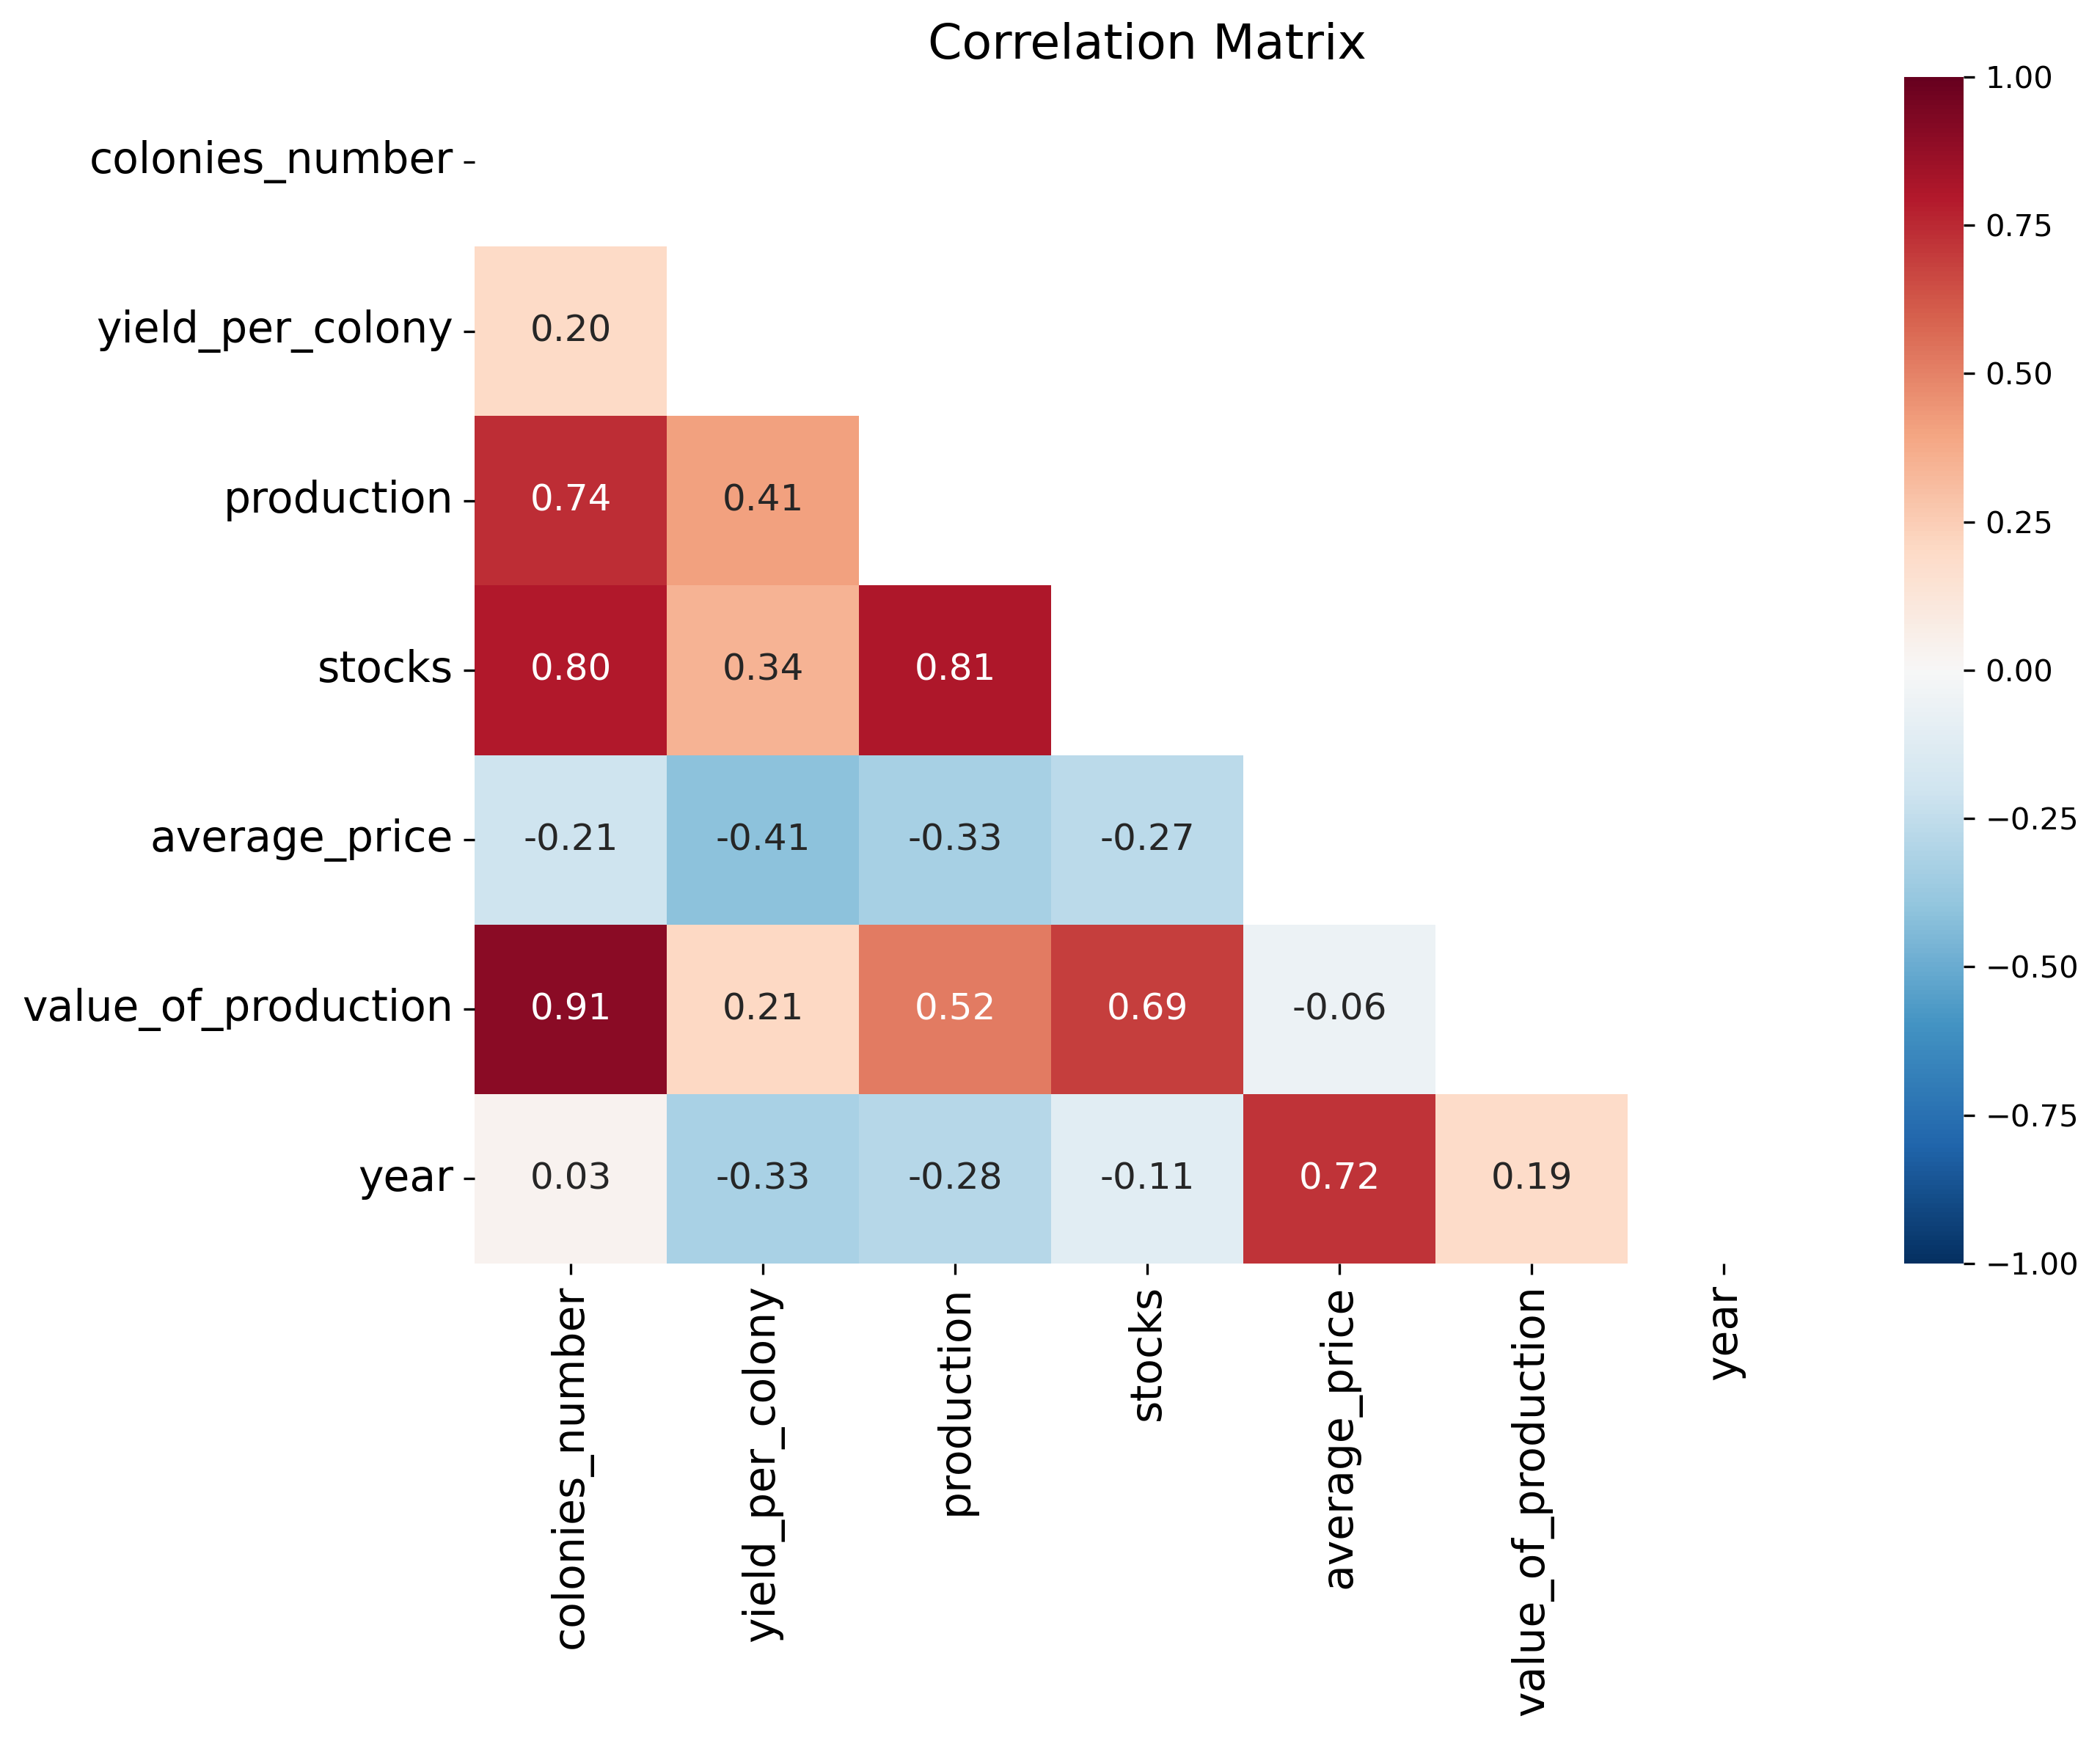


Key Statistical Insights:

colonies_number:
Mean: 62438.57
Median: 26000.00
Standard Deviation: 92648.18

yield_per_colony:
Mean: 59.74
Median: 57.00
Standard Deviation: 19.94

production:
Mean: 2851268.16
Median: 828000.00
Standard Deviation: 5561202.14

stocks:
Mean: 1172625.11
Median: 370000.00
Standard Deviation: 2049555.67

average_price:
Mean: 1.85
Median: 1.55
Standard Deviation: 1.17

value_of_production:
Mean: 5667411.66
Median: 2281000.00
Standard Deviation: 9459460.46


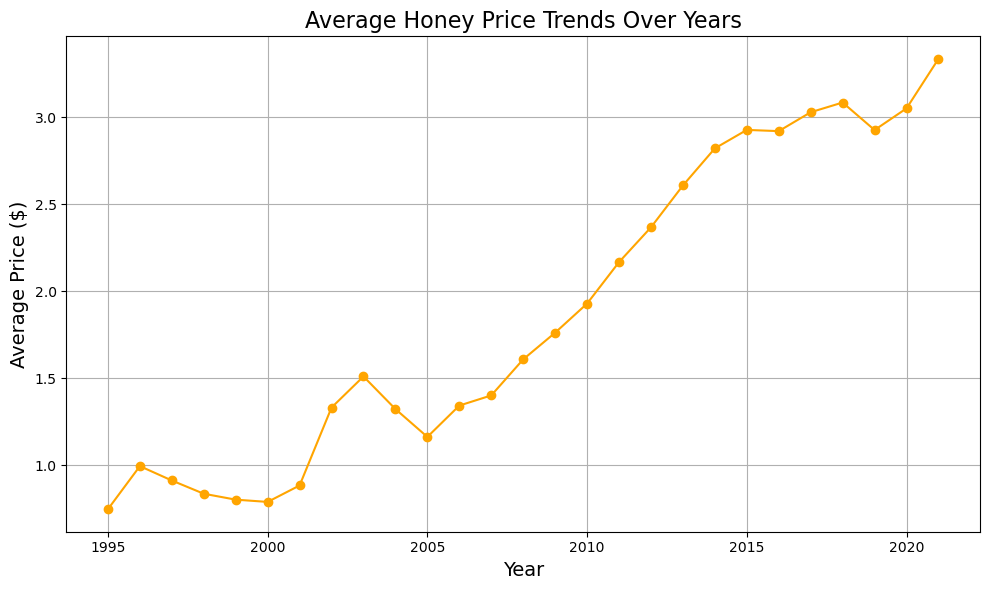

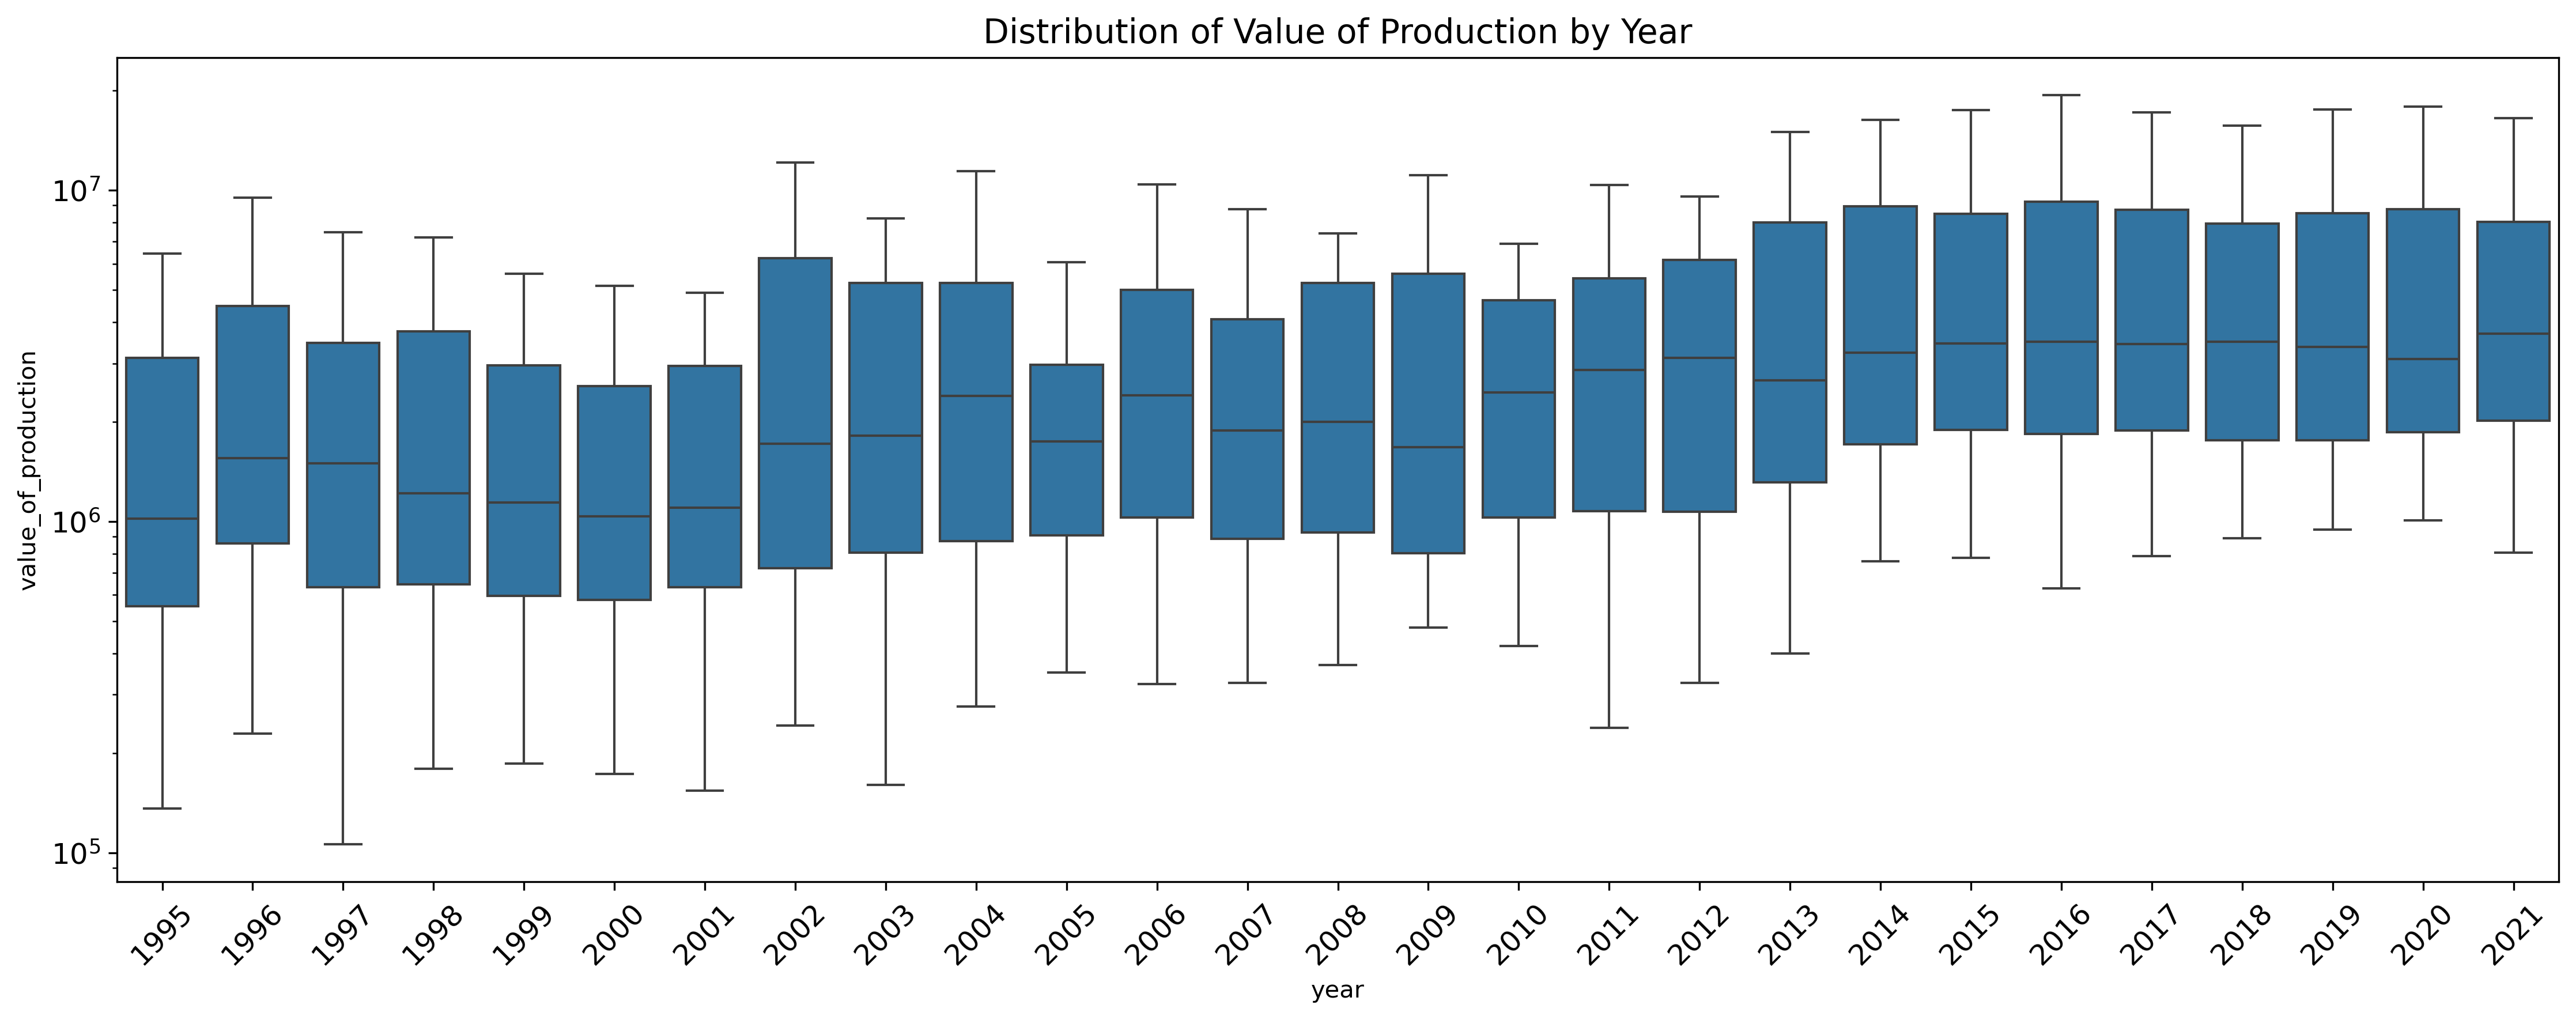

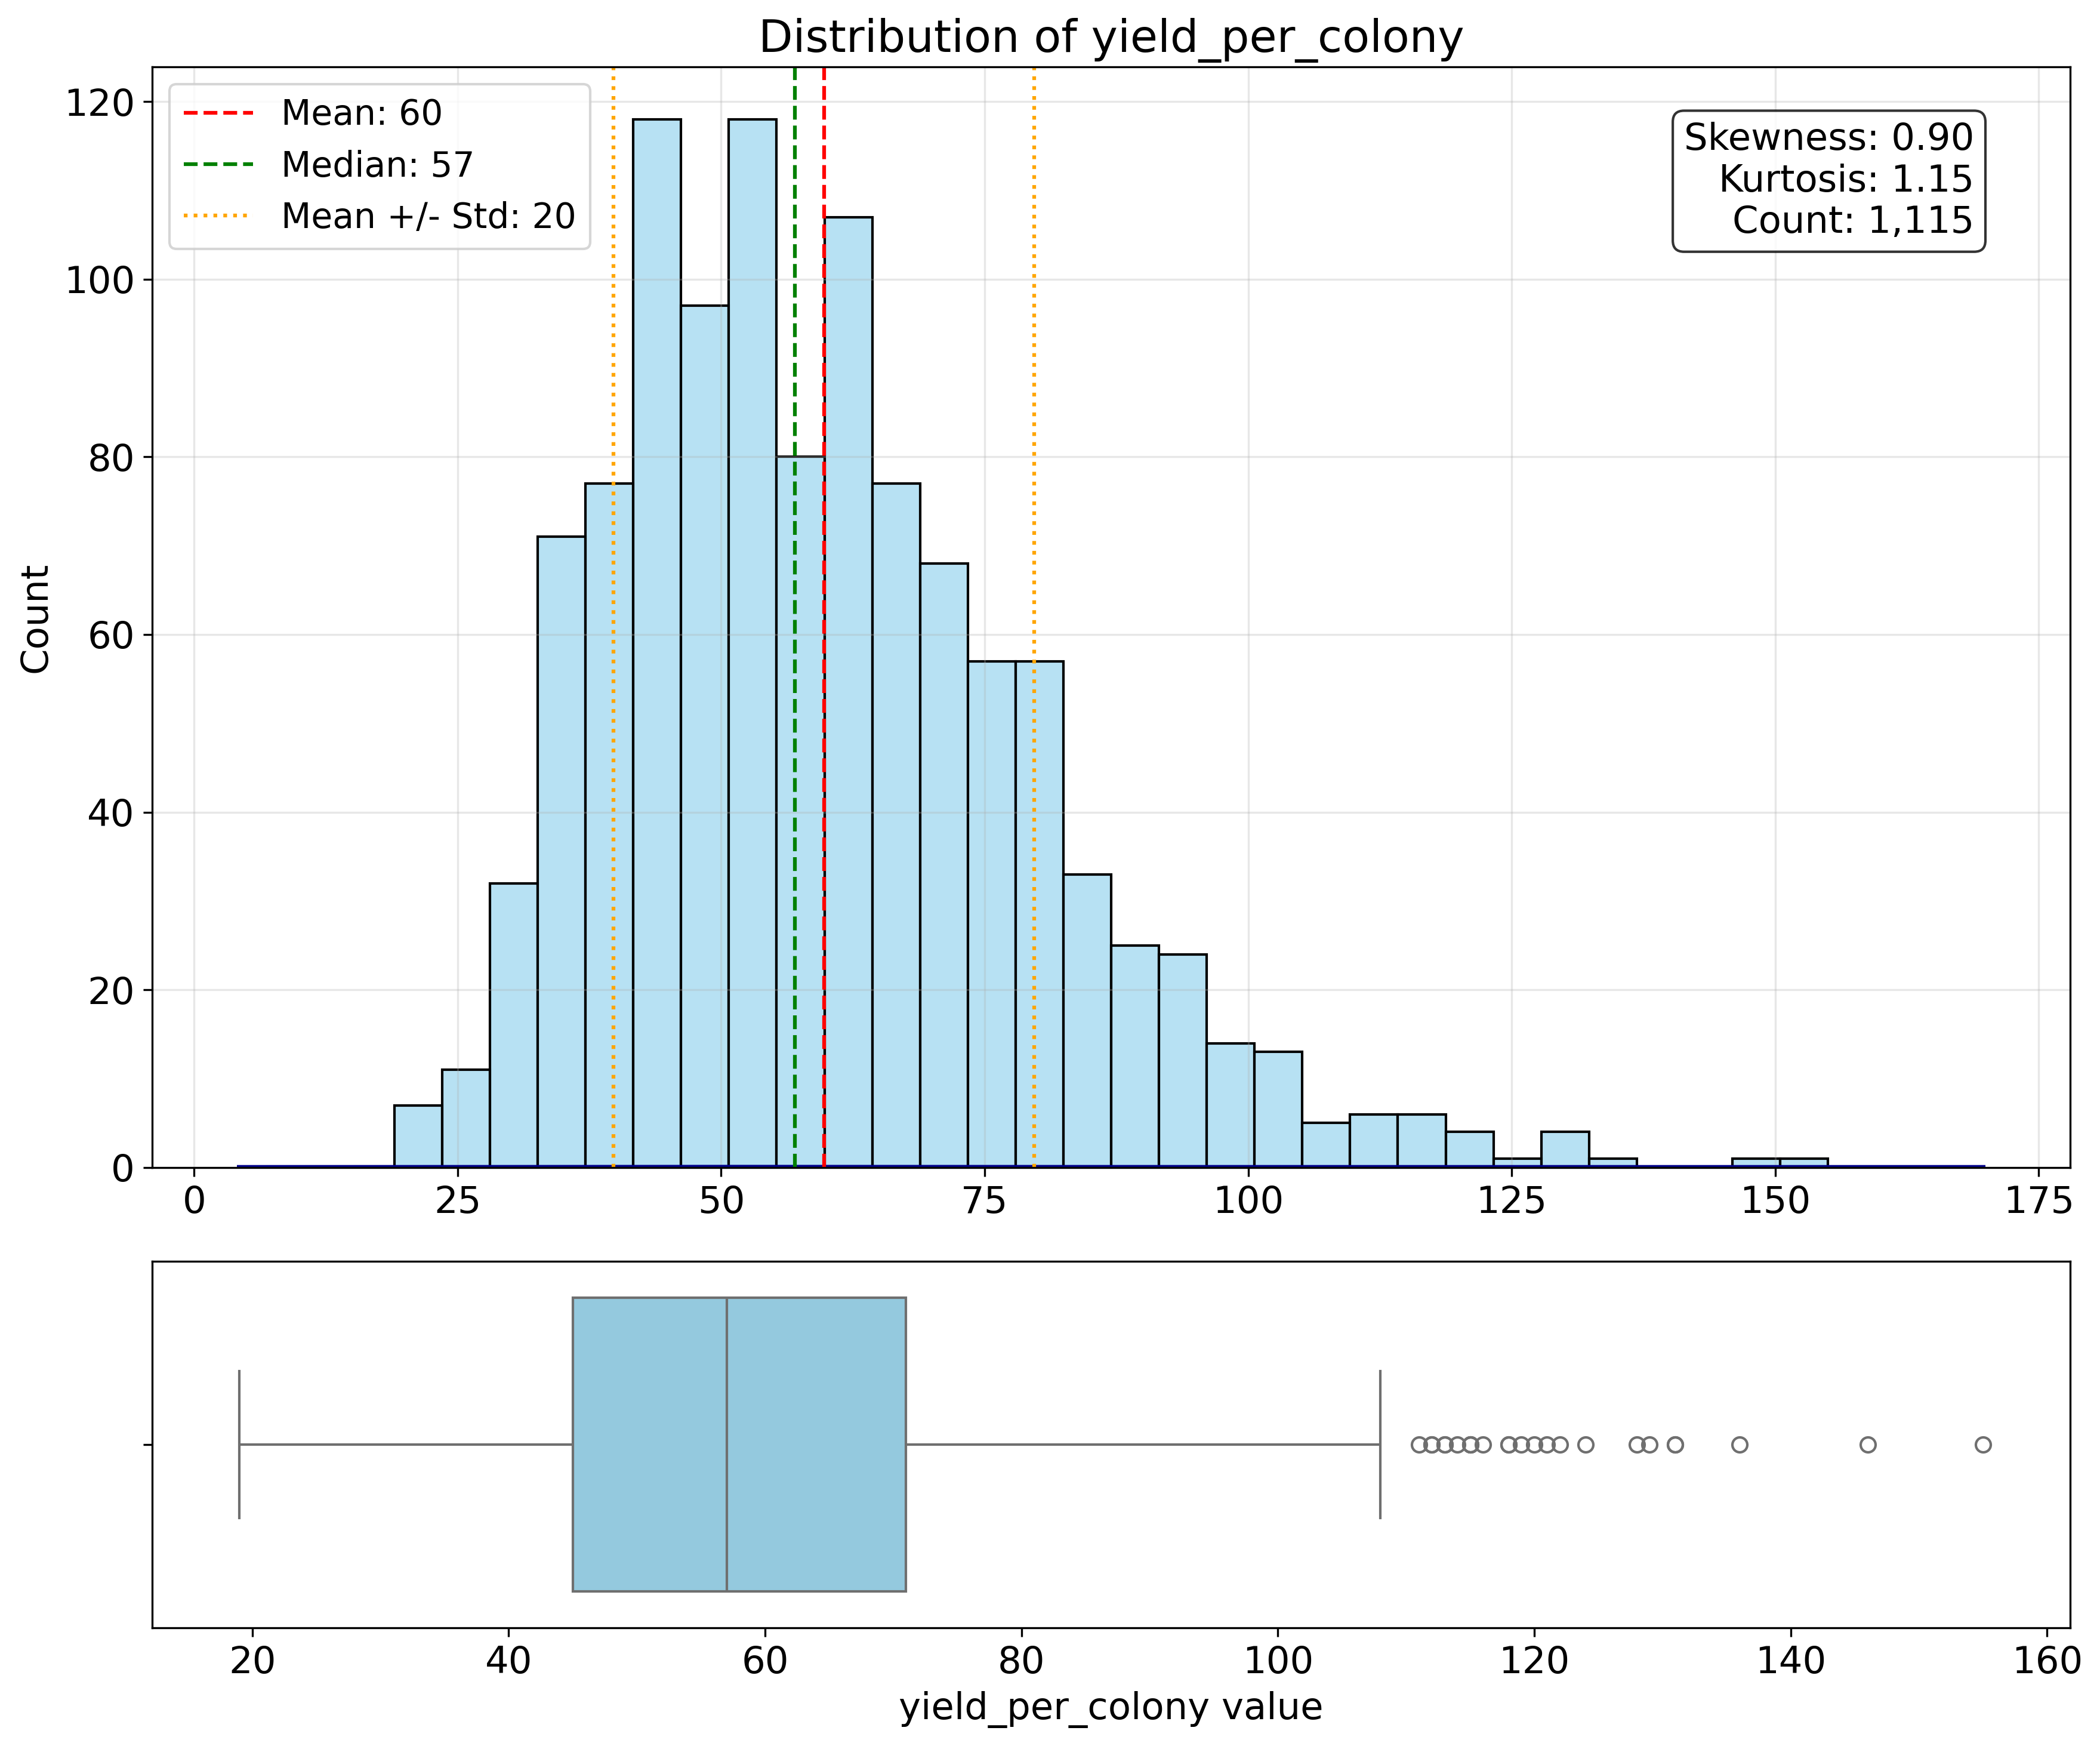


Silhouette Scores:
2 clusters: 0.75

Silhouette Scores:
3 clusters: 0.74

Silhouette Scores:
4 clusters: 0.64

Silhouette Scores:
5 clusters: 0.60

Silhouette Scores:
6 clusters: 0.41

Silhouette Scores:
7 clusters: 0.41

Silhouette Scores:
8 clusters: 0.44

Silhouette Scores:
9 clusters: 0.41

Silhouette Scores:
10 clusters: 0.41


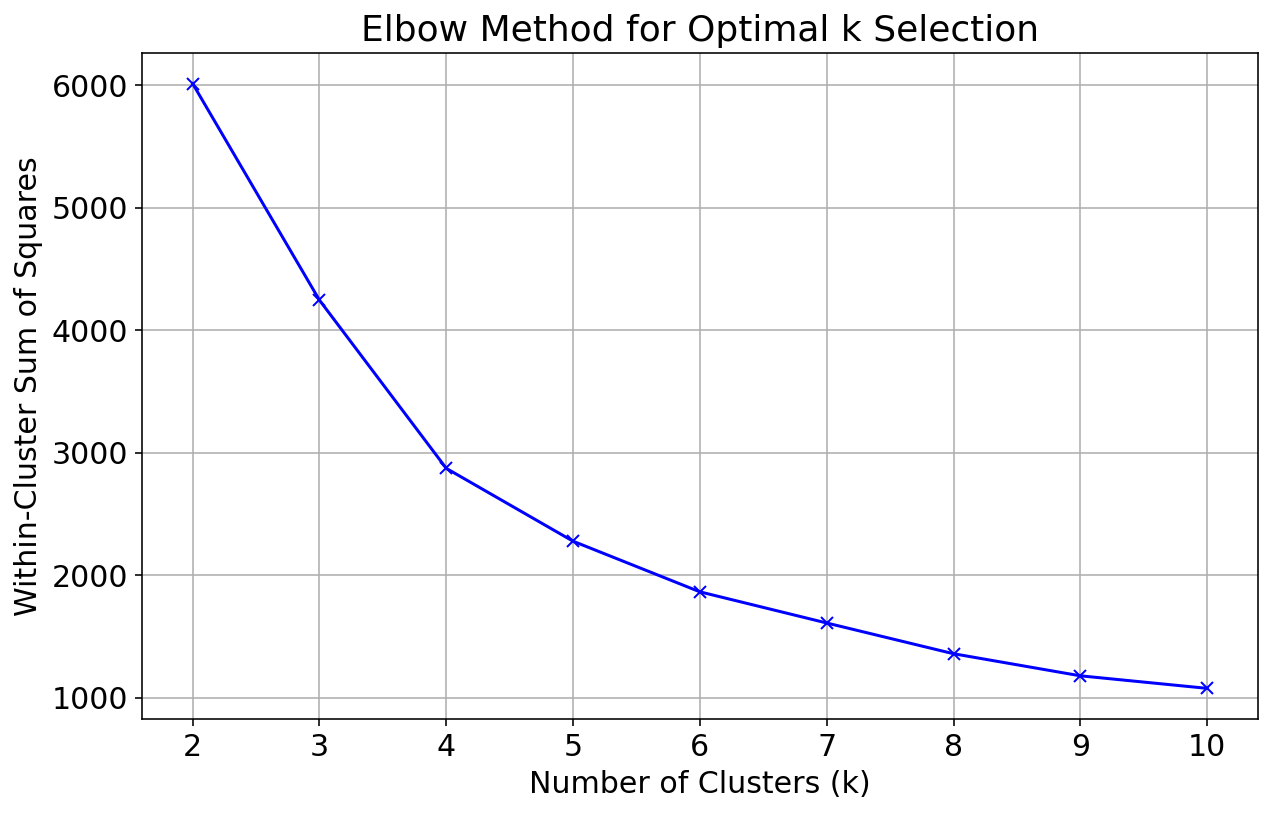

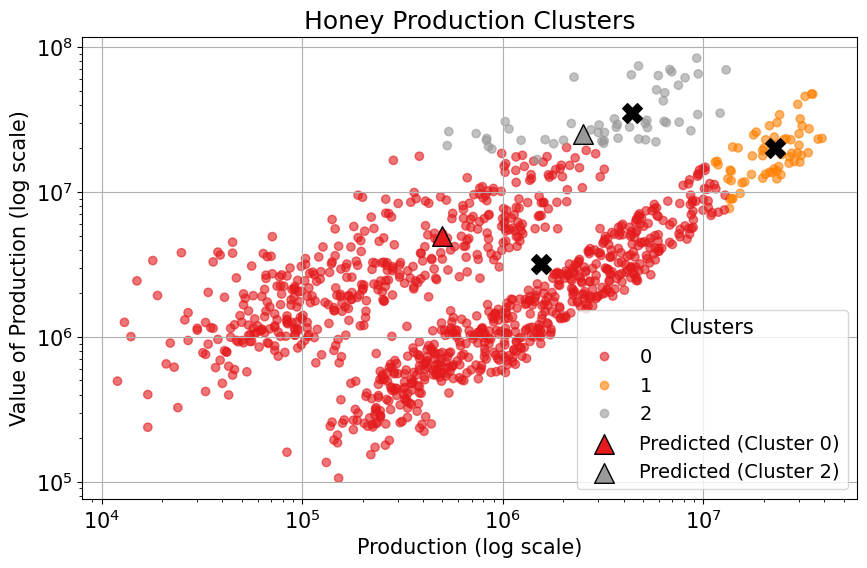

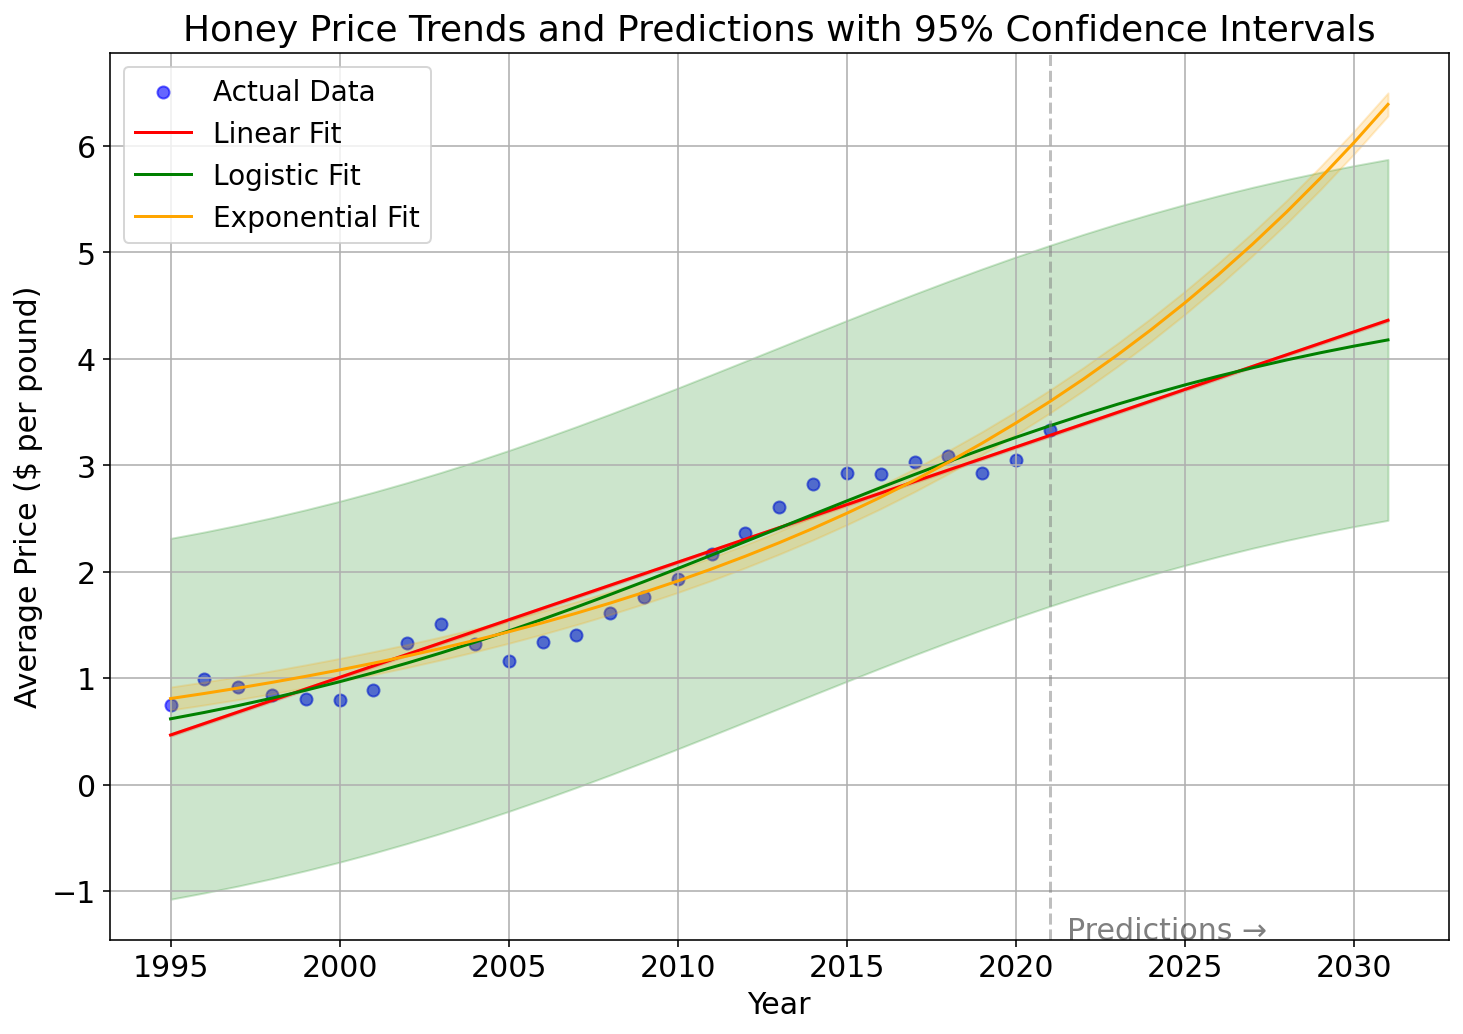


Price Predictions with 95% Confidence Intervals:

Predictions for 2025:
Linear model: 3.71 $ per pound (95% CI: [3.70, 3.72])
Logistic model: 3.76 $ per pound (95% CI: [2.06, 5.45])
Exponential model: 4.53 $ per pound (95% CI: [4.42, 4.64])

Predictions for 2030:
Linear model: 4.25 $ per pound (95% CI: [4.24, 4.27])
Logistic model: 4.12 $ per pound (95% CI: [2.42, 5.82])
Exponential model: 6.04 $ per pound (95% CI: [5.93, 6.14])

Predictions for 2035:
Linear model: 4.80 $ per pound (95% CI: [4.79, 4.81])
Logistic model: 4.37 $ per pound (95% CI: [2.67, 6.06])
Exponential model: 8.04 $ per pound (95% CI: [7.93, 8.15])


In [11]:
df = pd.read_csv('US_honey_dataset_updated.csv')
df = df.drop('Unnamed: 0', axis=1) #drops the unnamed: 0 column

# Converting average prices before 2018 from cents to dollars 
df.loc[df['year'] < 2018, 'average_price'] = df.loc[df['year'] < 2018, 'average_price'] / 100

# Perform statistical analysis
perform_statistical_analysis(df)

yearly_price = df.groupby('year')['average_price'].mean()
create_line_chart(df)

# Create visualization plots
create_categorical_graph(df, 'year', 'value_of_production')
create_statistical_graph(df, 'yield_per_colony')

features = ['colonies_number', 'yield_per_colony', 'production', 'value_of_production']

#plot elbow graph
plot_elbow_chart(df, features)

# Perform clustering
kmeans, clusters, scaler = perform_clustering_analysis(df, features)

# Plot clusters
new_points = [
    [20000, 60, 500000, 5000000],
    [200000, 80, 2500000, 25000000]]

plot_clusters(df, clusters, 'production', 'value_of_production', kmeans.cluster_centers_)

# Perform fitting analysis
yearly_price = df.groupby('year')['average_price'].mean().reset_index()
plot_price_trends_and_predictions(yearly_price, 10)